<h1><center>Purdue Physics 580</center></h1>
<h3><center>Computational Physics - Giordano & Nakanishi</center></h3>
<br></br>
<h3><center>Chapter 2</center></h3>
<br></br>
<center>Ethan Knox</center>
<center>ethank5149@gmail.com</center>
<center>www.github.com/ethank5149</center>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

## Exercise 1

The velocity of a freely falling object near Earth's surface is described by the equation

$$\frac{dv}{dt}=-g$$

where $v$ is the velocity and $g = 9.8 m/s^2$ is the acceleration due to gravity. Write a program that employs the Euler method to compute the solution to (1.8); that is, calculate $v$ as a function of $t$. For simplicity, assume that the initial velocity is zero—that is, the object starts from rest—and calculate the solution for times $t = 0$ to $t = 10$ s. Repeat the calculation for several different values of the time step, and compare the results with the exact solution to (1.8). It turns out that for this case the Euler method gives the exact result. Verify this with your numerical results and prove it analytically.


In [28]:
def get_data(m,P,dt,t_final,v_0):
    try:
        data = np.genfromtxt(f"data/exercise2_1_m={m}_P={P}_dt={dt}_tf={t_final}_v0={v_0}.csv",delimiter=',')[1:]
        return data
    except:
        print("File not found!")
        print("Copy-Paste the following parameters after running 'exercise2_1.exe':")
        print(f"{m} {P} {dt} {t_final} {v_0}")
        print(f"{v_0}")
        return None

In [29]:
m = 70 # [kg]
P = 400 # [W]
t_final = 200 # [s]
v0 = 4 # [m/s]

In [17]:
def f_v_a(t):
    return np.sqrt(v0**2+2*P*t/m)

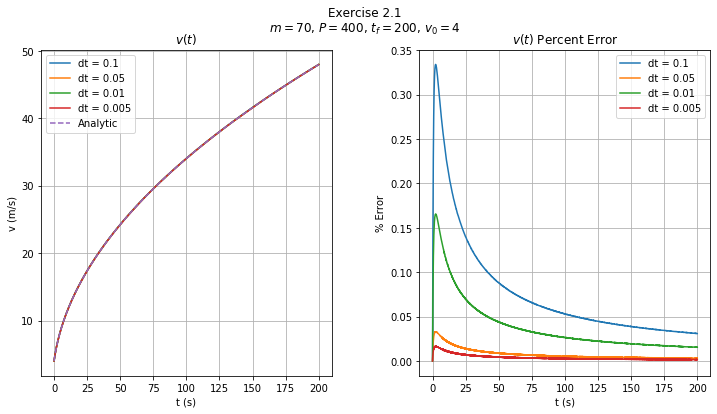

In [27]:
data1 = get_data(m,P,0.1,t_final,v0)
data2 = get_data(m,P,0.01,t_final,v0)
data3 = get_data(m,P,0.05,t_final,v0)
data4 = get_data(m,P,0.005,t_final,v0)

t1,v1 = [np.array(data1[:,s]) for s in range(2)]
t2,v2 = [np.array(data2[:,s]) for s in range(2)]
t3,v3 = [np.array(data3[:,s]) for s in range(2)]
t4,v4 = [np.array(data4[:,s]) for s in range(2)]

t = np.linspace(0,t_final,int(t_final/0.001))
v_a = f_v_a(t)
v1_a = f_v_a(t1)
v2_a = f_v_a(t2)
v3_a = f_v_a(t3)
v4_a = f_v_a(t4)

# Plotting
###############################################################################
fig, ax = plt.subplots(1,2,figsize=(12,6))
fig.suptitle("Exercise 2.1\n"+rf"$m = {m}$, $P = {P}$, $t_f = {t_final}$, $v_0 = {v0}$")

ax[0].set_title(r"$v(t)$ - No Drag")
ax[0].set_xlabel("t (s)")
ax[0].set_ylabel(r"v (m/s)")
ax[0].plot(t1,v1,label='dt = 0.1')
ax[0].plot(t2,v2,label='dt = 0.05')
ax[0].plot(t3,v3,label='dt = 0.01')
ax[0].plot(t4,v4,label='dt = 0.005')
ax[0].plot(t,v_a,linestyle="--",label='Analytic')
ax[0].legend()
ax[0].grid()

ax[1].set_title(r"$v(t)$ Percent Error")
ax[1].set_xlabel("t (s)")
ax[1].set_ylabel(r"% Error")
ax[1].plot(t1,100*(v1-v1_a)/v1_a,label='dt = 0.1')
ax[1].plot(t2,100*(v2-v2_a)/v2_a,label='dt = 0.05')
ax[1].plot(t3,100*(v3-v3_a)/v3_a,label='dt = 0.01')
ax[1].plot(t4,100*(v4-v4_a)/v4_a,label='dt = 0.005')
ax[1].legend()
ax[1].grid()
plt.subplots_adjust(wspace=0.3)
plt.show()
###############################################################################

## Exercise 2

The position of an object moving horizontally with a constant velocity, $v$, is 
described by the equation 

$$\frac{dx}{dt}=v.$$

Assuming that the velocity is a constant, say $v = 40 m/s$, use the Euler method to solve (1.9) for $x$ as a function of time. Compare your result with the exact solution.

In [30]:
def get_data(m,C,rho,A,P,dt,t_final,v0):
    try:
        data = np.genfromtxt(f"data/exercise2_2_m={m}_C={C}_r={rho}_A={A}_P={P}_dt={dt}_tf={t_final}_v0={v0}.csv",delimiter=',')[1:]
        return data
    except:
        print("File not found!")
        print("Copy-Paste the following parameters after running 'exercise1_2.exe':")
        print(f"{m} {C} {rho} {A} {P} {dt} {t_final}")
        print(f"{v0}")
        return None

In [34]:
m = 70 # [kg]
P = 400 # [W]
t_final = 200 # [s]
v0 = 4 # [m/s]
C = 0.5
A_front = 0.33
A_middle = 0.3*A_front
rho_air = 1.225
dt = 0.01

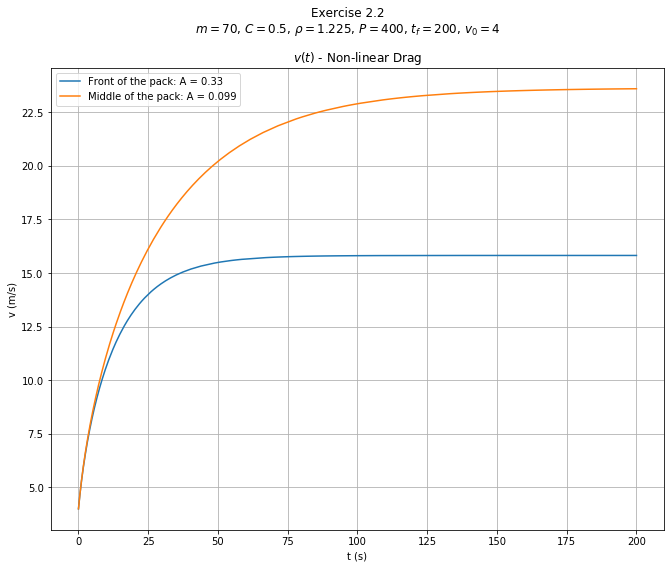

In [42]:
data1 = get_data(m,C,rho_air,A_front,P,dt,t_final,v0)
data2 = get_data(m,C,rho_air,A_middle,P,dt,t_final,v0)

t1,v1 = [np.array(data1[:,s]) for s in range(2)]
t2,v2 = [np.array(data2[:,s]) for s in range(2)]
 
# Plotting
###############################################################################
fig, ax = plt.subplots(1,1,figsize=(11,8.5))
fig.suptitle("Exercise 2.2\n"+rf"$m = {m}$, $C = {C}$, $\rho = {rho_air}$, $P = {P}$, $t_f = {t_final}$, $v_0 = {v0}$")

# Plot theta vs. t
ax.set_title(r"$v(t)$ - Non-linear Drag")
ax.set_xlabel("t (s)")
ax.set_ylabel(r"v (m/s)")
ax.plot(t1,v1,label=f'Front of the pack: A = {A_front}')
ax.plot(t2,v2,label=f'Middle of the pack: A = {A_middle}')
ax.legend()
ax.grid()
plt.show()
###############################################################################

## Exercise 3

It is often the case that the frictional force on an object will increase as the object moves faster. A fortunate example of this is a parachutist; the role of the parachute is to produce a frictional force due to air drag, which is larger than would normally be the case without the parachute. The physics of air drag will be discussed in more detail in the next chapter. Here we consider a very simple example in which the frictional force depends on the velocity. Assume that the velocity of an object obeys an equation of the form 

$$\frac{dv}{dt}=a-bv,$$

where $a$ and $b$ are constants. You could think of $a$ as coming from an applied force, such as gravity, while $b$ arises from friction. Note that the frictional force is negative (we assume that $b > 0$), so that it opposes the motion, and that it increases in magnitude as the velocity increases. Use the Euler method to solve (1.10) for $v$ as a function of time. A convenient choice of parameters is $a = 10$ and $b = 1$. You should find that $v$ approaches a constant value at long times; this is called the terminal velocity.

Analytic Treatment:

$$m\ddot{x}=-b\left|v\right|\cdot\frac{\dot{x}}{\left|v\right|}\rightarrow \ddot{x}=-\frac{b}{m}\dot{x}$$
$$m\ddot{y}=-g-b\left|v\right|\cdot\frac{\dot{y}}{\left|v\right|}\rightarrow \ddot{y}=-g-\frac{b}{m}\dot{y}$$

$\ddot{x}+\frac{b}{m}\dot{x}=0\mid\left\{x\left(0\right)=x_0,\,\,\dot{x}\left(0\right)=\dot{x}_0\right\}:$
$$x\left(t\right)=c_1+c_2e^{-\frac{b}{m}t}\rightarrow \fbox{$x\left(t\right)=x_0+\frac{m}{b}\dot{x}_0\left(1-e^{-\frac{b}{m}t}\right)$}$$
$$\therefore\fbox{$\dot{x}\left(t\right)=\dot{x}_0e^{-\frac{b}{m}t}$}$$

$\ddot{y}+\frac{b}{m}\dot{y}+g=0\mid\left\{y\left(0\right)=y_0,\,\,\dot{y}\left(0\right)=\dot{y}_0\right\}:$
$$y\left(t\right)=c_1e^{\frac{1}{2}\left(-\sqrt{\left(\frac{b}{m}\right)^2-4g}-\frac{b}{m}\right)t}+c_2e^{\frac{1}{2}\left(\sqrt{\left(\frac{b}{m}\right)^2-4g}-\frac{b}{m}\right)t}\rightarrow$$
$$\fbox{$y\left(t\right)=y_0+\frac{m}{b}\left(\left(\frac{mg}{b}+\dot{y}_0\right)\left(1-e^{-\frac{b}{m}t}\right)-gt\right)$}$$
$$\therefore\fbox{$\dot{y}\left(t\right)=\frac{mg}{b}\left(\left(1+\frac{b}{mg}\dot{y}_0\right)e^{-\frac{b}{m}t}-1\right)$}$$

In [48]:
def get_data(m,C,rho,eta,A,P,dt,t_final,v0):
    try:
        data = np.genfromtxt(f"data/exercise2_3_m={m}_C={C}_r={rho}_e={eta}_A={A}_P={P}_dt={dt}_tf={t_final}_v0={v0}.csv",delimiter=',')[3:]
        return data
    except:
        print("File not found!")
        print("Copy-Paste the following parameters after running 'exercise2_3.exe':")
        print(f"{m} {C} {rho} {eta} {A} {P} {dt} {t_final}")
        print(f"{v0}")
        return None

In [49]:
m = 70 # [kg]
P = 400 # [W]
t_final = 200 # [s]
v0 = 4 # [m/s]
C = 0.5
A_front = 0.33
A_middle = 0.3*A_front
rho_air = 1.225
rho_water = 1000
eta_air = 0.00002
eta_water = 0.003

dt = 0.01

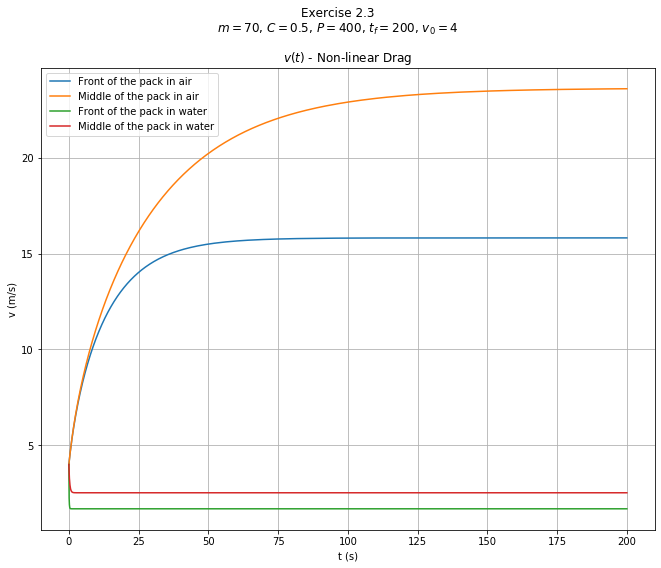

In [56]:
data1 = np.genfromtxt(f"data/exercise2_3_front_air.csv",delimiter=',',skip_header=3)
data2 = np.genfromtxt(f"data/exercise2_3_middle_air.csv",delimiter=',',skip_header=3)
data3 = np.genfromtxt(f"data/exercise2_3_front_water.csv",delimiter=',',skip_header=3)
data4 = np.genfromtxt(f"data/exercise2_3_middle_water.csv",delimiter=',',skip_header=3)

t1,v1 = [np.array(data1[:,s]) for s in range(2)]
t2,v2 = [np.array(data2[:,s]) for s in range(2)]
t3,v3 = [np.array(data3[:,s]) for s in range(2)]
t4,v4 = [np.array(data4[:,s]) for s in range(2)]
 
# Plotting
###############################################################################
fig, ax = plt.subplots(1,1,figsize=(11,8.5))
fig.suptitle("Exercise 2.3\n"+rf"$m = {m}$, $C = {C}$, $P = {P}$, $t_f = {t_final}$, $v_0 = {v0}$")

# Plot theta vs. t
ax.set_title(r"$v(t)$ - Non-linear Drag")
ax.set_xlabel("t (s)")
ax.set_ylabel(r"v (m/s)")
ax.plot(t1,v1,label=f'Front of the pack in air')
ax.plot(t2,v2,label=f'Middle of the pack in air')
ax.plot(t3,v3,label=f'Front of the pack in water')
ax.plot(t4,v4,label=f'Middle of the pack in water')
ax.legend()
ax.grid()
plt.show()
###############################################################################

## Exercise 4

$$\frac{dE}{dt}=P,\,\,E=\frac{1}{2}mv^2+mgh$$
$$\frac{dE}{dt}=mv\left(\dot{v}+g\sin(\theta)\right)\rightarrow P=mv\left(\dot{v}+g\sin(\theta)\right)$$
$$m\dot{v}=\frac{P}{v}-mg\sin(\theta)$$

In [57]:
m = 70 # [kg]
P = 400 # [W]
t_final = 200 # [s]
v0 = 4 # [m/s]
C = 0.5
A_front = 0.33
A_middle = 0.3*A_front
rho_air = 1.225
rho_water = 1000
eta_air = 0.00002
eta_water = 0.003
theta_incline = 10
theta_decline = -10

dt = 0.01

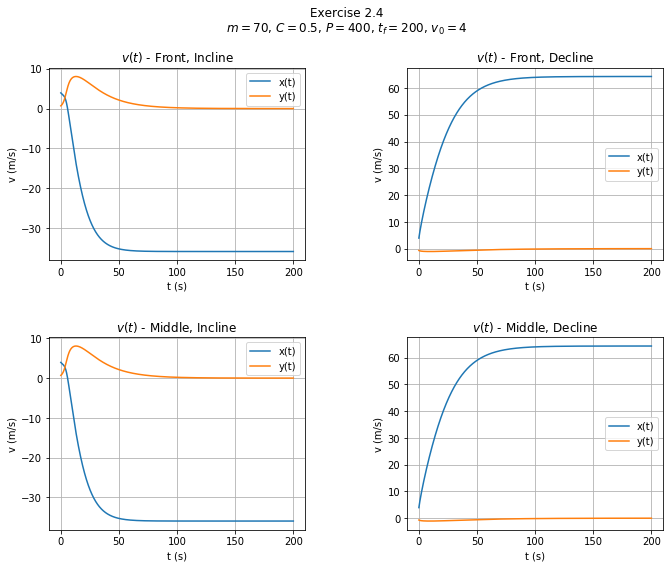

In [67]:
data1 = np.genfromtxt(f"data/exercise2_4_front_incline.csv",delimiter=',',skip_header=3)
data2 = np.genfromtxt(f"data/exercise2_4_middle_decline.csv",delimiter=',',skip_header=3)
data3 = np.genfromtxt(f"data/exercise2_4_front_incline.csv",delimiter=',',skip_header=3)
data4 = np.genfromtxt(f"data/exercise2_4_middle_decline.csv",delimiter=',',skip_header=3)

t1,vx1,vy1 = [np.array(data1[:,s]) for s in range(3)]
t2,vx2,vy2 = [np.array(data2[:,s]) for s in range(3)]
t3,vx3,vy3 = [np.array(data3[:,s]) for s in range(3)]
t4,vx4,vy4 = [np.array(data4[:,s]) for s in range(3)]
 
# Plotting
###############################################################################
fig, ax = plt.subplots(2,2,figsize=(11,8.5))
fig.suptitle("Exercise 2.4\n"+rf"$m = {m}$, $C = {C}$, $P = {P}$, $t_f = {t_final}$, $v_0 = {v0}$")

# Plot theta vs. t
ax[0,0].set_title(r"$v(t)$ - Front, Incline")
ax[0,0].set_xlabel("t (s)")
ax[0,0].set_ylabel(r"v (m/s)")
ax[0,0].plot(t1,vx1,label=f'x(t)')
ax[0,0].plot(t1,vy1,label=f'y(t)')
ax[0,0].legend()
ax[0,0].grid()

ax[0,1].set_title(r"$v(t)$ - Front, Decline")
ax[0,1].set_xlabel("t (s)")
ax[0,1].set_ylabel(r"v (m/s)")
ax[0,1].plot(t2,vx2,label=f'x(t)')
ax[0,1].plot(t2,vy2,label=f'y(t)')
ax[0,1].legend()
ax[0,1].grid()

ax[1,0].set_title(r"$v(t)$ - Middle, Incline")
ax[1,0].set_xlabel("t (s)")
ax[1,0].set_ylabel(r"v (m/s)")
ax[1,0].plot(t3,vx3,label=f'x(t)')
ax[1,0].plot(t3,vy3,label=f'y(t)')
ax[1,0].legend()
ax[1,0].grid()

ax[1,1].set_title(r"$v(t)$ - Middle, Decline")
ax[1,1].set_xlabel("t (s)")
ax[1,1].set_ylabel(r"v (m/s)")
ax[1,1].plot(t4,vx4,label=f'x(t)')
ax[1,1].plot(t4,vy4,label=f'y(t)')
ax[1,1].legend()
ax[1,1].grid()
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plt.show()
###############################################################################

## Exercise 5

Consider again a decay problem with two types of nuclei $A$ and $B$, but now suppose that nuclei of type $A$ decay into ones of type $B$, while nuclei of type $B$ decay into ones of type $A$. Strictly speaking, this is not a "decay" process, since it is possible for the type $B$ nuclei to turn back into type $A$ nuclei. A better analogy would be a resonance in which a system can tunnel or move back and forth between two states $A$ and $B$ which have equal energies. The corresponding rate equations are 

$$\frac{dN_A}{dt}=\frac{N_B}{\tau}-\frac{N_A}{\tau},$$
$$\frac{dN_B}{dt}=\frac{N_A}{\tau}-\frac{N_B}{\tau},$$

where for simplicity we have assumed that the two types of decay are characterized by the same time constant, $\tau$. Solve this system of equations for the numbers of nuclei, $N_A$ and $N_B$, as functions of time. Consider different initial conditions, such as $N_A = 100,\, N_B = 0$, etc., and take $t = 1 s$. Show that your numerical results are consistent with the idea that the system reaches a steady state in which $N_A$ and $N_B$ are constant. In such a steady state, the time derivatives $\frac{dN_A}{dt}$ and $\frac{dN_B}{dt}$ should vanish.

In [30]:
def get_data(t_A,t_B,A_0,B_0,dt,t_final):
    try:
        data = np.genfromtxt(f"data/exercise1_5_tA={t_A}_tB={t_B}_dt={dt}_tf={t_final}_A0={A_0}_B0={B_0}.csv",delimiter=',')[1:]
        return data
    except:
        print("File not found!")
        print("Copy-Paste the following parameters after running 'exercise1_5.exe':")
        print(f"{t_A} {t_B} {dt} {t_final} {A_0} {B_0}")
        return None

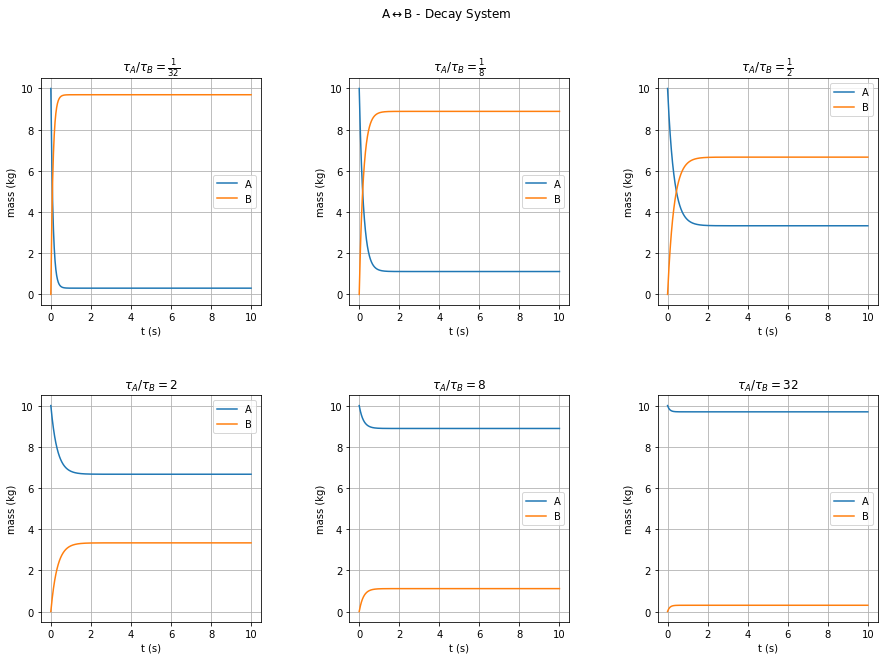

In [32]:
# Constants/Parameters
###############################################################################
t_As = [0.125,0.25,0.5,1,2,4]
t_Bs = [4,2,1,0.5,0.25,0.125]
dt = 0.01
Na0,Nb0 = 10,0
t_final=10
###############################################################################

t = np.linspace(0,t_final,round(t_final/0.001))

data1 = get_data(t_As[0],t_Bs[0],Na0,Nb0,dt,t_final)
data2 = get_data(t_As[1],t_Bs[1],Na0,Nb0,dt,t_final)
data3 = get_data(t_As[2],t_Bs[2],Na0,Nb0,dt,t_final)
data4 = get_data(t_As[3],t_Bs[3],Na0,Nb0,dt,t_final)
data5 = get_data(t_As[4],t_Bs[4],Na0,Nb0,dt,t_final)
data6 = get_data(t_As[5],t_Bs[5],Na0,Nb0,dt,t_final)

t1,A1,B1,dA1,dB1 = [np.array(data1[:,s]) for s in range(5)]
t2,A2,B2,dA2,dB2 = [np.array(data2[:,s]) for s in range(5)]
t3,A3,B3,dA3,dB3 = [np.array(data3[:,s]) for s in range(5)]
t4,A4,B4,dA4,dB4 = [np.array(data4[:,s]) for s in range(5)]
t5,A5,B5,dA5,dB5 = [np.array(data5[:,s]) for s in range(5)]
t6,A6,B6,dA6,dB6 = [np.array(data6[:,s]) for s in range(5)]

# Plotting
###############################################################################
fig, ax = plt.subplots(2,3,figsize=(15,10))
fig.suptitle(r"A$\leftrightarrow$B - Decay System")

ax[0,0].set_title(r'''$\tau_A/\tau_B = \frac{1}{32}$''')
ax[0,0].set_xlabel("t (s)")
ax[0,0].set_ylabel(r"mass (kg)")
ax[0,0].plot(t1,A1,linestyle="-",label='A')
ax[0,0].plot(t1,B1,linestyle="-",label='B')
ax[0,0].legend()
ax[0,0].grid()

ax[0,1].set_title(r'''$\tau_A/\tau_B = \frac{1}{8}$''')
ax[0,1].set_xlabel("t (s)")
ax[0,1].set_ylabel(r"mass (kg)")
ax[0,1].plot(t2,A2,linestyle="-",label='A')
ax[0,1].plot(t2,B2,linestyle="-",label='B')
ax[0,1].legend()
ax[0,1].grid()

ax[0,2].set_title(r'''$\tau_A/\tau_B = \frac{1}{2}$''')
ax[0,2].set_xlabel("t (s)")
ax[0,2].set_ylabel(r"mass (kg)")
ax[0,2].plot(t3,A3,linestyle="-",label='A')
ax[0,2].plot(t3,B3,linestyle="-",label='B')
ax[0,2].legend()
ax[0,2].grid()

ax[1,0].set_title(r'''$\tau_A/\tau_B = 2$''')
ax[1,0].set_xlabel("t (s)")
ax[1,0].set_ylabel(r"mass (kg)")
ax[1,0].plot(t4,A4,linestyle="-",label='A')
ax[1,0].plot(t4,B4,linestyle="-",label='B')
ax[1,0].legend()
ax[1,0].grid()

ax[1,1].set_title(r'''$\tau_A/\tau_B = 8$''')
ax[1,1].set_xlabel("t (s)")
ax[1,1].set_ylabel(r"mass (kg)")
ax[1,1].plot(t5,A5,linestyle="-",label='A')
ax[1,1].plot(t5,B5,linestyle="-",label='B')
ax[1,1].legend()
ax[1,1].grid()

ax[1,2].set_title(r'''$\tau_A/\tau_B = 32$''')
ax[1,2].set_xlabel("t (s)")
ax[1,2].set_ylabel(r"mass (kg)")
ax[1,2].plot(t6,A6,linestyle="-",label='A')
ax[1,2].plot(t6,B6,linestyle="-",label='B')
ax[1,2].legend()
ax[1,2].grid()

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()
###############################################################################

## Exercise 6

Population growth problems often give rise to rate equations that are first-order. For example, the equation 

$$\frac{dN}{dt}=aN-bN^2$$

might describe how the number of individuals in a population, $N$, varies with time. Here the first term $aN$ corresponds to the birth of new members, while the second term $-bN^2$ corresponds to deaths. The death term is proportional to $N^2$ to allow for the fact that food will become harder to find when the population $N$ becomes large. Begin by solving (1.13) with $b = 0$ using the Euler method, and compare your numerical result with the exact solution. Then solve (1.13) with nonzero values $b$. Give an intuitive explanation of your results. Interesting values of $a$ and $b$ depend on the initial population $N$. For small $N(0)$, $a = 10$ and $b = 3$ is a good choice, while for $N(0) = 1000$ a good choice is $a = 10$ and $b=0.01$. 

Analytic Treatment:

$$\dot{N}=aN-bN^2\rightarrow \dot{N}=N\left(a-bN\right)$$

$\dot{N}-aN+bN^2=0\mid\left\{N\left(0\right)=N_0\right\}:$

$$N\left(t\right)=\frac{ae^{a\left(c_1 + t\right)}}{be^{a\left(c_1 + t\right)} + 1}\rightarrow \fbox{$N\left(t\right)=\frac{aN_0e^{at}}{bN_0\left(e^{at}-1\right)+a}$}$$

In [57]:
def get_data(a,b,N0,dt,t_final):
    try:
        data = np.genfromtxt(f"data/exercise1_6_a={a}_b={b}_dt={dt}_tf={t_final}_N0={N0}.csv",delimiter=',')[1:]
        return data
    except:
        print("File not found!")
        print("Copy-Paste the following parameters after running 'exercise1_6.exe':")
        print(f"{a} {b} {dt} {t_final} {N0}")
        return None

In [75]:
a1,a2,a3 = 1, 1, 1
b1,b2,b3 = 0, 1, 0.01
N01,N02,N03 = 0.01, 0.01, 0.01
dt = 0.01
t_final = 10

In [76]:
def N_a(a,b,N0,t):
    return a*N0*np.exp(a*t)/(b*N0*(np.exp(a*t)-1)+a)

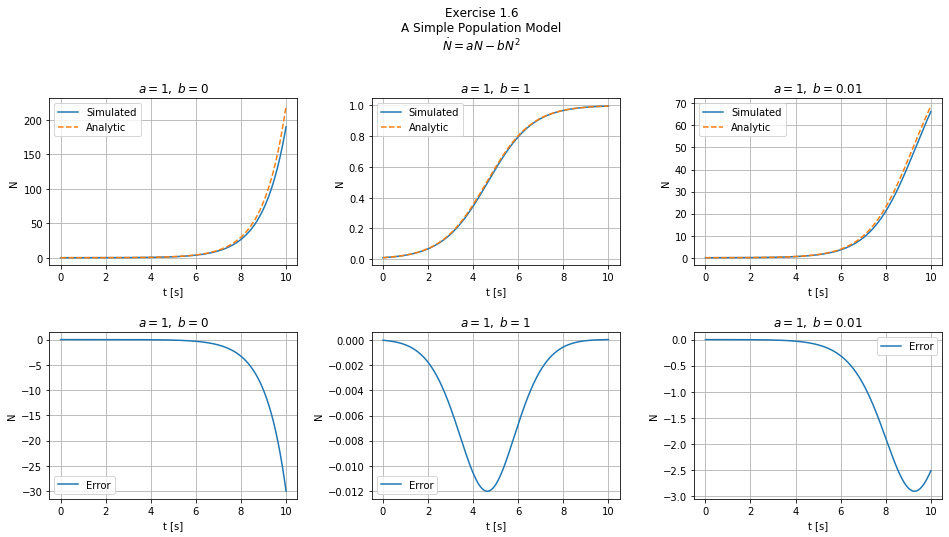

In [81]:
t = np.linspace(0,t_final,round(t_final/0.0001))

data1 = get_data(a1,b1,N01,dt,t_final)
data2 = get_data(a2,b2,N02,dt,t_final)
data3 = get_data(a3,b3,N03,dt,t_final)


t1,N1,dN1 = [np.array(data1[:,s]) for s in range(3)]
t2,N2,dN2 = [np.array(data2[:,s]) for s in range(3)]
t3,N3,dN3 = [np.array(data3[:,s]) for s in range(3)]

# Plotting
###############################################################################
fig, ax = plt.subplots(2,3,figsize=(16,8))
fig.suptitle("Exercise 1.6\nA Simple Population Model\n"+r"$\dot{N}=aN-bN^2$")

ax[0,0].set_title(rf"$a={a1},\,\,b={b1}$")
ax[0,0].plot(t1,N1,linestyle="-",label='Simulated')
ax[0,0].plot(t1,N_a(a1,b1,N01,t1),linestyle="--",label='Analytic')

ax[0,1].set_title(rf"$a={a2},\,\,b={b2}$")
ax[0,1].plot(t2,N2,linestyle="-",label='Simulated')
ax[0,1].plot(t2,N_a(a2,b2,N02,t2),linestyle="--",label='Analytic')

ax[0,2].set_title(rf"$a={a3},\,\,b={b3}$")
ax[0,2].plot(t3,N3,linestyle="-",label='Simulated')
ax[0,2].plot(t3,N_a(a3,b3,N03,t3),linestyle="--",label='Analytic')

ax[1,0].set_title(rf"$a={a1},\,\,b={b1}$")
ax[1,0].plot(t1,N1-N_a(a1,b1,N01,t1),linestyle="-",label='Error')

ax[1,1].set_title(rf"$a={a2},\,\,b={b2}$")
ax[1,1].plot(t2,N2-N_a(a2,b2,N02,t2),linestyle="-",label='Error')

ax[1,2].set_title(rf"$a={a3},\,\,b={b3}$")
ax[1,2].plot(t3,N3-N_a(a3,b3,N03,t3),linestyle="-",label='Error')

for i in range(2):
    for j in range(3):
        ax[i,j].set_xlabel("t [s]")
        ax[i,j].set_ylabel(r"N")
        ax[i,j].legend()
        ax[i,j].grid()

plt.subplots_adjust(wspace=0.3, hspace=0.4, top=0.82)
plt.show()
###############################################################################

# Chapter 2

## Exercise 1

## Exercise 2

## Exercise 3

## Exercise 4

## Exercise 5

## Exercise 6

## Exercise 7

## Exercise 8

## Exercise 9

## Exercise 10

## Exercise 11

## Exercise 12

## Exercise 13

## Exercise 14

## Exercise 15

## Exercise 16

## Exercise 17

## Exercise 18

## Exercise 19

## Exercise 20

## Exercise 21

## Exercise 22

## Exercise 23

## Exercise 24

## Exercise 25

## Exercise 26

## Exercise 27

# Chapter 3

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

# Chapter 4

# Chapter 5

# Chapter 6

# Chapter 7

# Chapter 8

# Chapter 9

# Chapter 10

# Chapter 11

# Chapter 12